In [72]:
import numpy as np # 
import pandas as pd # 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [73]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [75]:
df.info() # challenges ---- 
# null values present and object datatype present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)
'''
Cabin          77.104377 -- drop the col
Age            19.865320 -- data imputation/fillna
Embarked        0.224467 -- drop the row
Rule -- 0-3% -- drop the rows,
3-40% -- fill/data imputation
>40% -- drop the col
'''

'\nCabin          77.104377 -- drop the col\nAge            19.865320 -- data imputation/fillna\nEmbarked        0.224467 -- drop the row\nRule -- 0-3% -- drop the rows,\n3-40% -- fill/data imputation\n>40% -- drop the col\n'

In [77]:
df.drop("Cabin",axis=1,inplace=True)

In [78]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Density'>

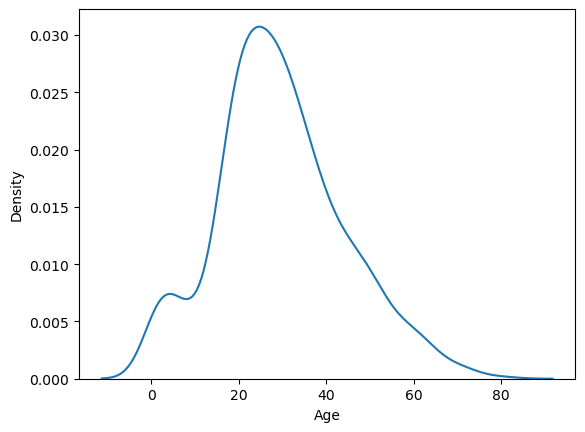

In [79]:
# age-- 
sns.kdeplot(df["Age"])

In [80]:
d=df["Age"].median()
df["Age"]=df["Age"].fillna(d)
df["Age"].isnull().sum()

0

In [81]:
df.dropna(inplace=True)

In [82]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [83]:
# according to my domain knowledge I am droping some features -- 
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [84]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [85]:
# object datatype
cat_col=df.select_dtypes("object").columns
cat_col

Index(['Sex', 'Embarked'], dtype='object')

In [86]:
df["Sex"].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [87]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [88]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[cat_col]=enc.fit_transform(df[cat_col])
df[cat_col]

,Sex,Embarked
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0
...,...,...
886,1.0,2.0
887,0.0,2.0
888,0.0,2.0
889,1.0,0.0


In [89]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0


In [90]:
df["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

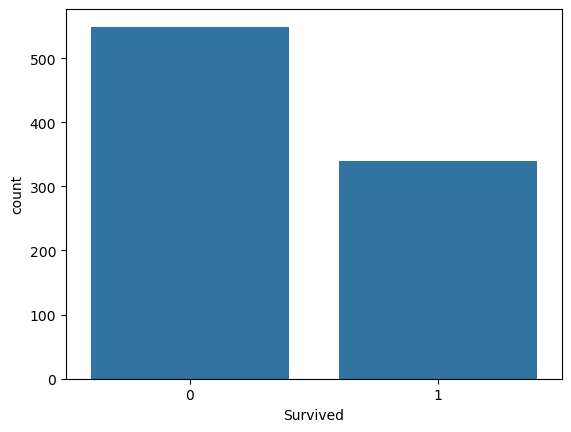

In [91]:
sns.countplot(data=df,x="Survived")

<Axes: xlabel='Survived', ylabel='count'>

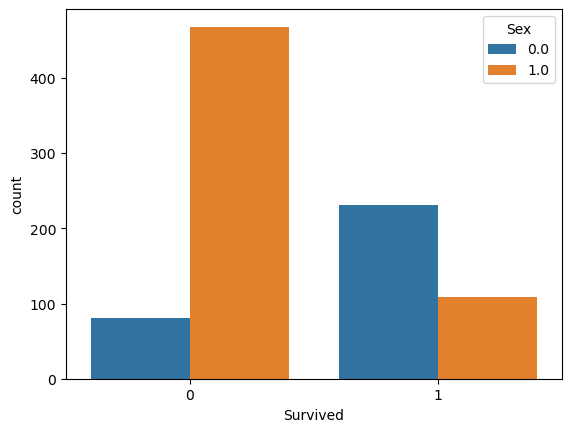

In [92]:
sns.countplot(data=df,x="Survived",hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

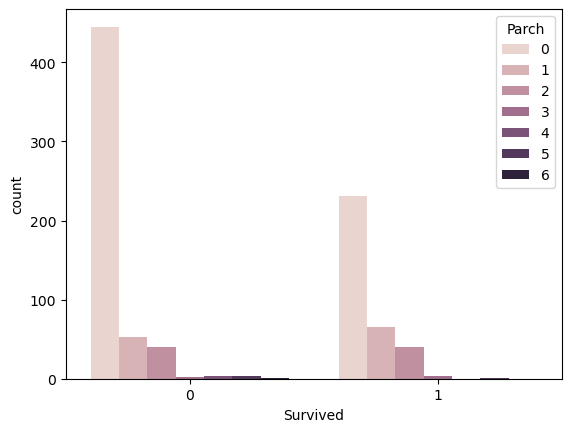

In [93]:
sns.countplot(data=df,x="Survived",hue="Parch") #vbvj

<Axes: xlabel='Survived', ylabel='count'>

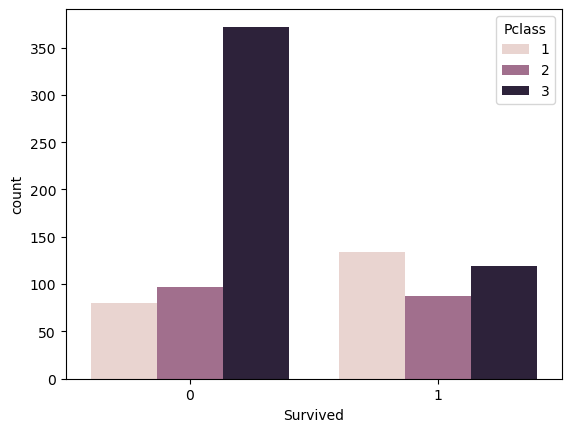

In [94]:
sns.countplot(data=df,x="Survived",hue="Pclass")

<Axes: xlabel='Fare', ylabel='Density'>

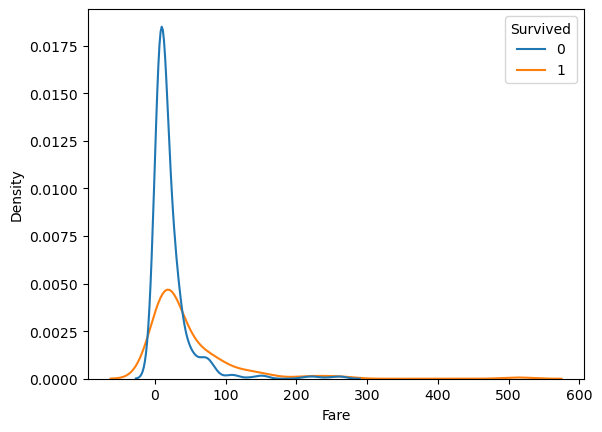

In [95]:
sns.kdeplot(df,x="Fare",hue="Survived") #

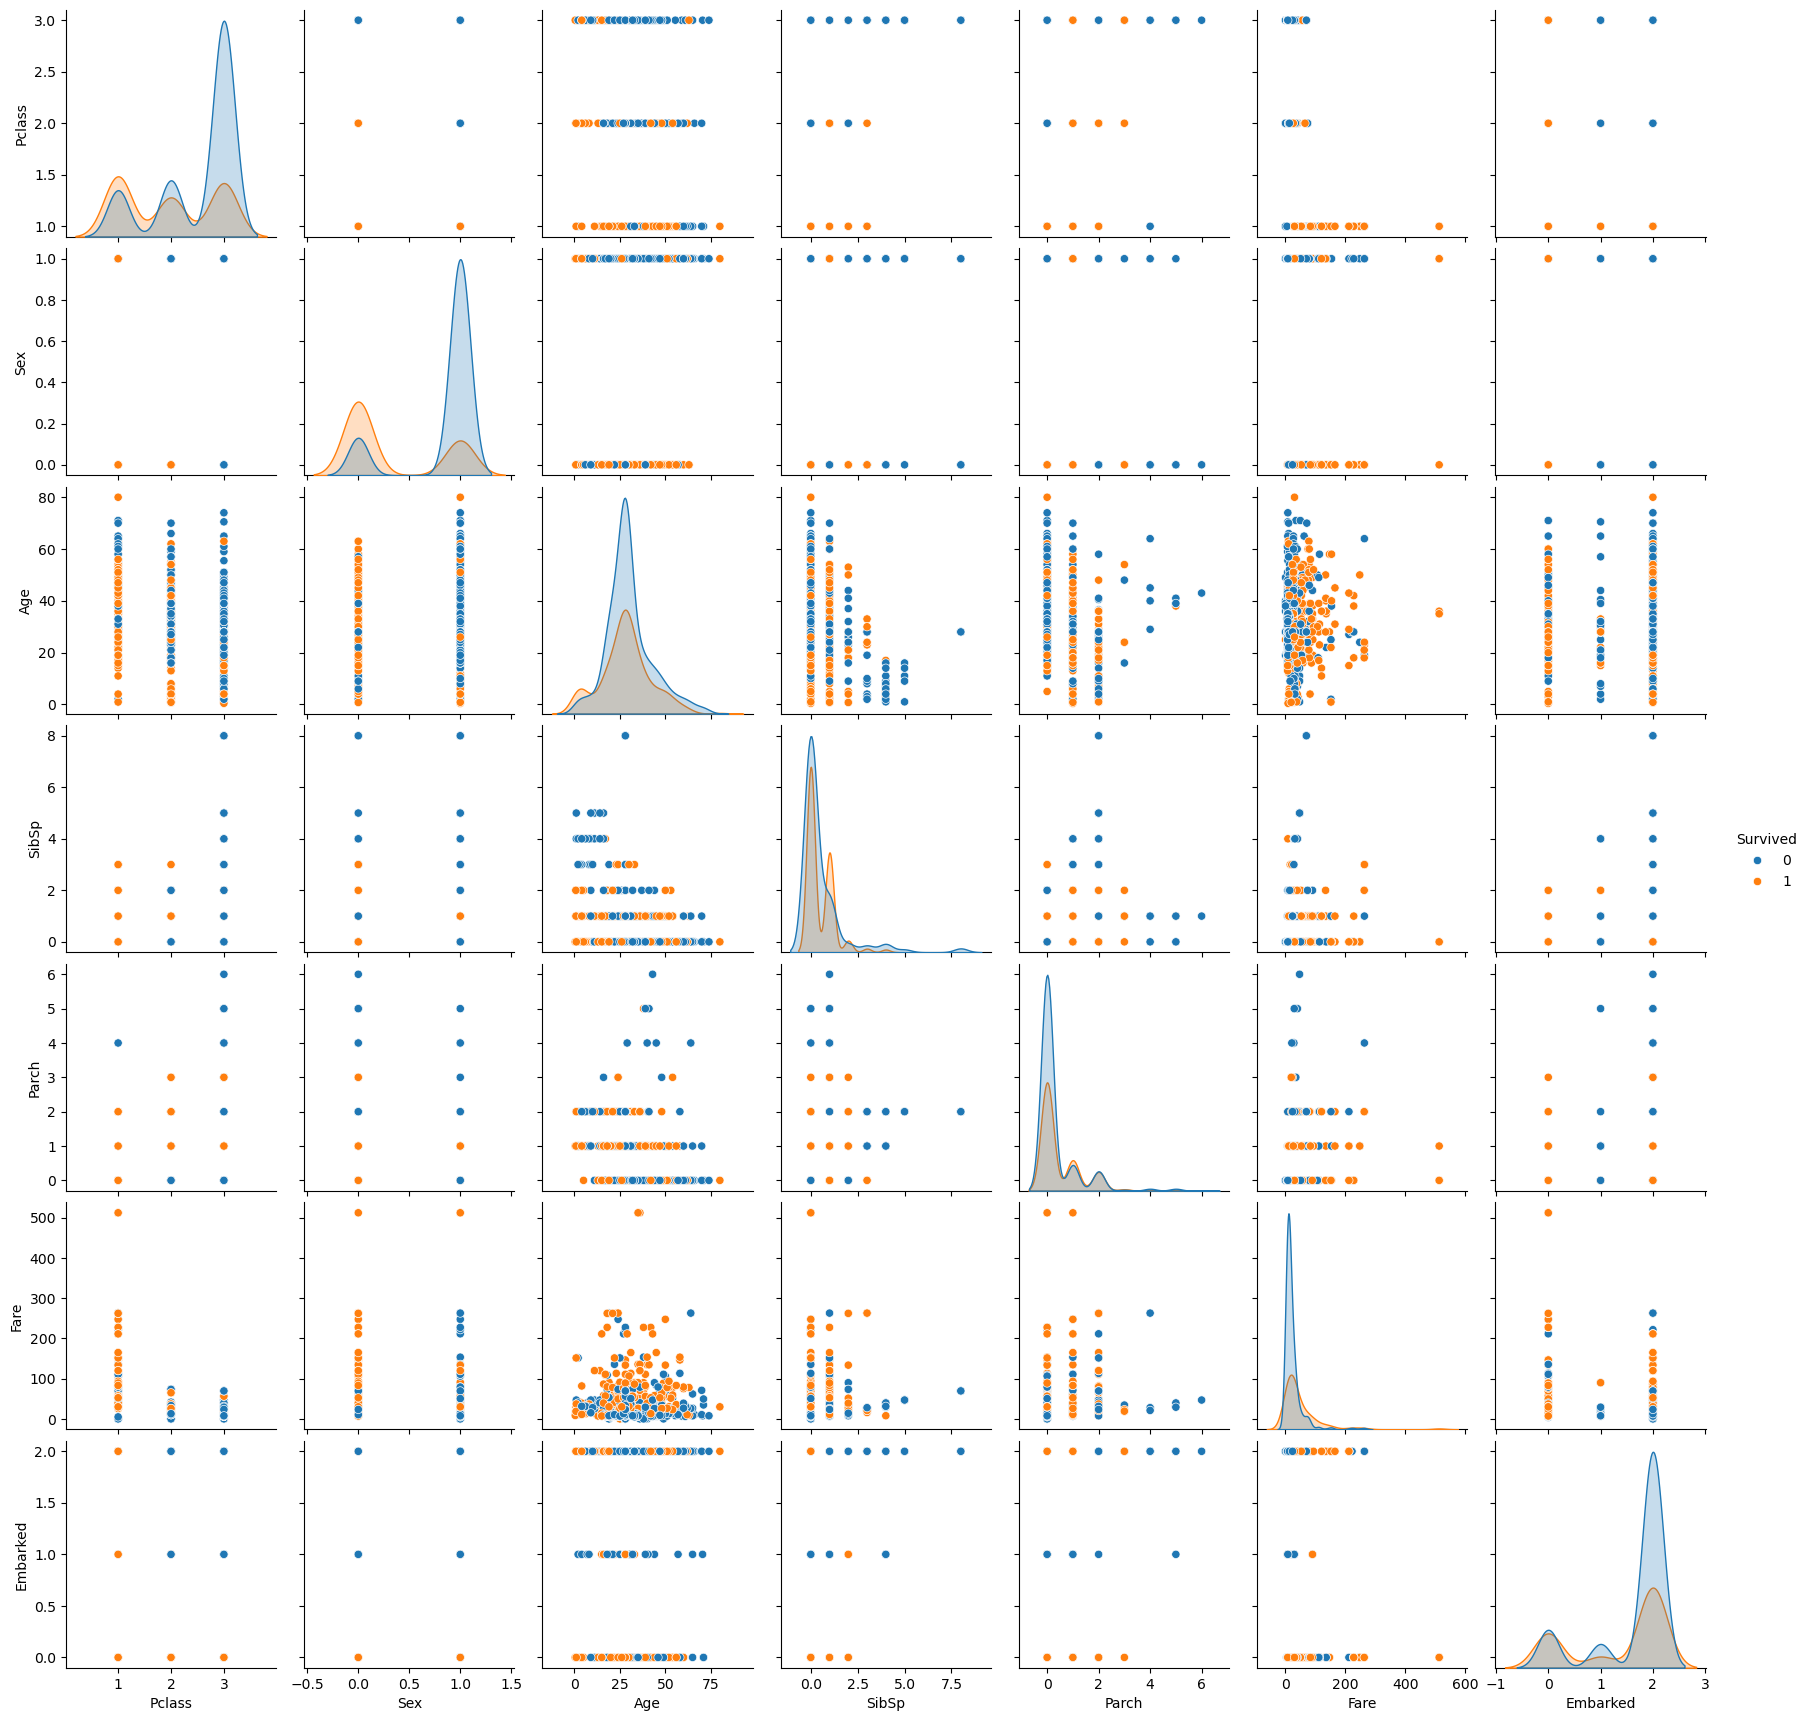

In [96]:
sns.pairplot(data=df,hue="Survived")

In [97]:
features=df.drop("Survived",axis=1)
target=df["Survived"]

In [98]:
features.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [99]:
df["Survived"].value_counts() # imbalanced data

Survived
0    549
1    340
Name: count, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features, target, 
                                           test_size=0.25, random_state=42,stratify=target)
print("Training Data Shape ",xtrain.shape,ytrain.shape)
print("Testing Data Shape ",xtest.shape,ytest.shape)

Training Data Shape  (666, 7) (666,)
Testing Data Shape  (223, 7) (223,)


In [101]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy : {ac}")
print(f"Confusion Matrix : \n{cm}")
print(f"Classification Report : \n{cr}")

Accuracy : 0.7802690582959642
Confusion Matrix : 
[[115  23]
 [ 26  59]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       138
           1       0.72      0.69      0.71        85

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



In [103]:
print(lr.score(xtrain,ytrain))
print(lr.score(xtest,ytest))
# training score> testing score -- overfitting

0.8018018018018018
0.7802690582959642


In [104]:
print(ytest[:25].values) # actual values
print(ypred[:25]) # predicted values

[0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0]
[0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [105]:
lr.predict_proba(xtest[:25].values)

array([[0.88168127, 0.11831873],
       [0.38436619, 0.61563381],
       [0.95056701, 0.04943299],
       [0.13016539, 0.86983461],
       [0.95385665, 0.04614335],
       [0.6287003 , 0.3712997 ],
       [0.21123227, 0.78876773],
       [0.49736246, 0.50263754],
       [0.9079701 , 0.0920299 ],
       [0.3579593 , 0.6420407 ],
       [0.83544736, 0.16455264],
       [0.33506934, 0.66493066],
       [0.56371771, 0.43628229],
       [0.88372829, 0.11627171],
       [0.94404611, 0.05595389],
       [0.86045069, 0.13954931],
       [0.9104858 , 0.0895142 ],
       [0.91656743, 0.08343257],
       [0.66972047, 0.33027953],
       [0.27540321, 0.72459679],
       [0.52912652, 0.47087348],
       [0.85171012, 0.14828988],
       [0.64350857, 0.35649143],
       [0.89513733, 0.10486267],
       [0.78069131, 0.21930869]])

In [106]:
# ROC-AUC Curve

In [143]:
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc_score(ytest,ypred)

0.7637254901960785

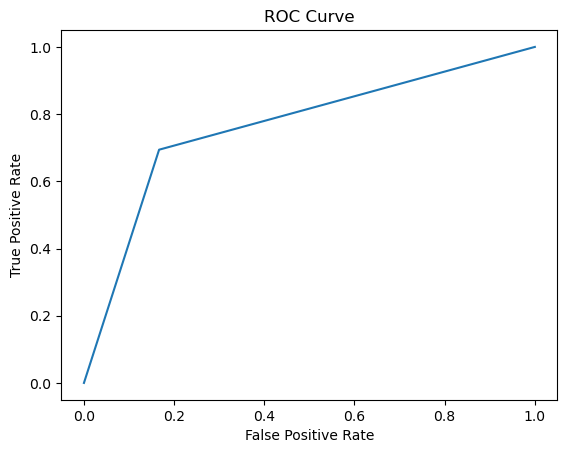

In [149]:
fpr,tpr,threh=roc_curve(ytest,ypred)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [163]:
from sklearn.preprocessing import binarize
ypred_proba=lr.predict_proba(xtest)[:,1]
ypr=binarize([ypred_proba],threshold=0.3)[0]

In [169]:
ypr=ypr.astype(int)
ypr.dtype

dtype('int32')

In [173]:
print(f"Actual Values : {ytest[:25].values}")
print(f"Predic Values : {ypr[:25]}")

Actual Values : [0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0]
Predic Values : [0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0]


In [175]:
roc_auc_score(ytest,ypr)

0.770460358056266

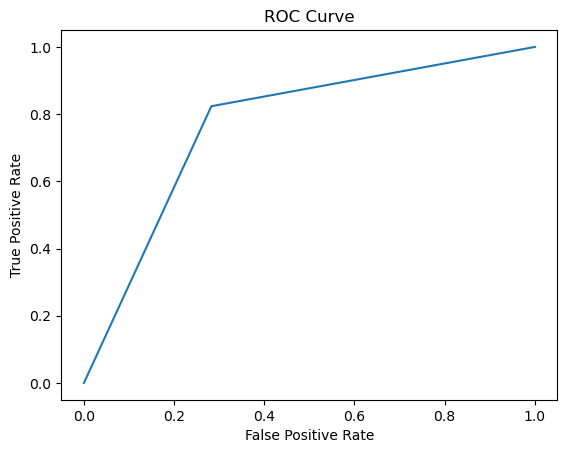

In [177]:
fpr,tpr,threh=roc_curve(ytest,ypr)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [179]:
ac=accuracy_score(ytest,ypr)
cm=confusion_matrix(ytest,ypr)
cr=classification_report(ytest,ypr)
print(f"Accuracy : {ac}")
print(f"Confusion Matrix : \n{cm}")
print(f"Classification Report : \n{cr}")

Accuracy : 0.757847533632287
Confusion Matrix : 
[[99 39]
 [15 70]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       138
           1       0.64      0.82      0.72        85

    accuracy                           0.76       223
   macro avg       0.76      0.77      0.75       223
weighted avg       0.78      0.76      0.76       223

